# 6.13.3. El problema de Flamant: cargas distribuidas lineales en medios semiinfinitos

Cuaderno elaborado con la ayuda de:
* Andrea Bustamante
* Hector Javier Rivera
* Cristian Camilo Osorio

Un problema de gran importancia práctica es la estimación de esfuerzos, deformaciones y desplazamientos al interior de un espacio semiinfinito sujeto a la acción de dos fuerzas  distribuidas lineales $P_x$ y $P_y$ concentradas en el origen de coordenadas, tal y como se muestra: 

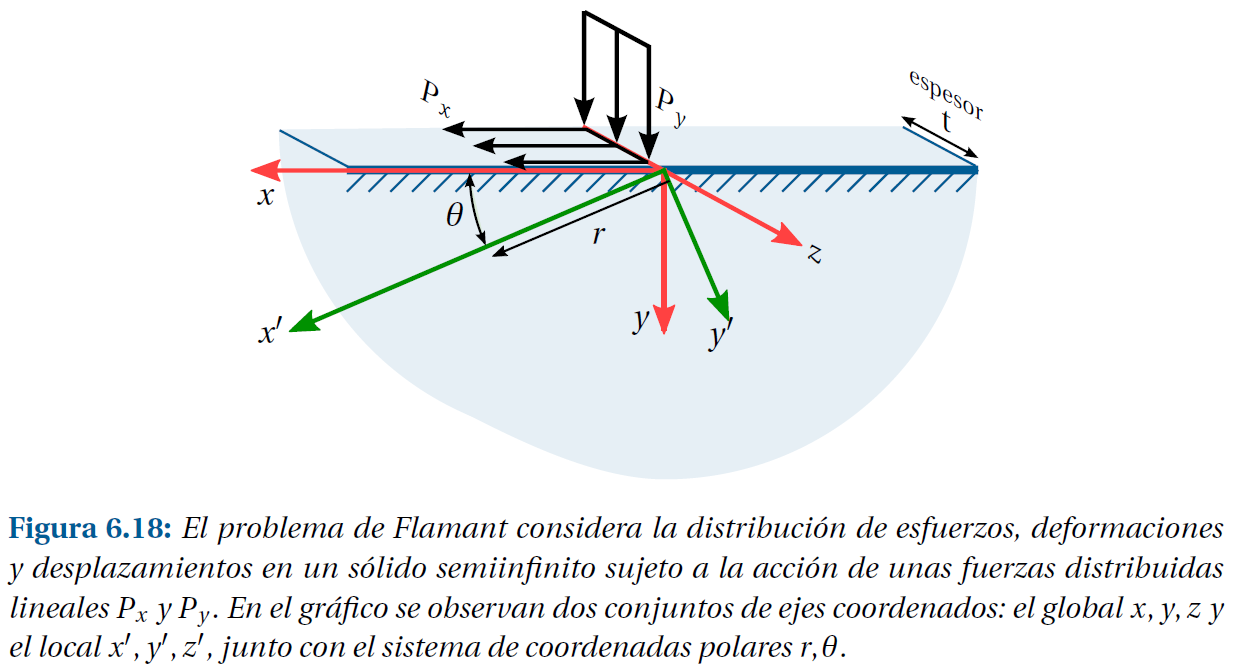

Este se conoce como el **problema de Flamant** en honor al ingeniero civil francés Alfred-Aimé Flamant (1839 - 1915), quien lo solucionó en 1892.

In [1]:
from sympy import init_printing, latex, symbols, integrate, log, diff, Function, expand, sin, cos, factor, sqrt, simplify, Eq, solve, dsolve, pi, atan2, lambdify

# Para imprimir bonito
init_printing()
from IPython.display import Math                 
def imprimir (texto1, variable, texto2=""):
    return Math(texto1 +  rf'{latex(variable)}' + texto2)

El problema de Flamant se soluciona utilizando la función de tensión de Airy dada por:
\begin{equation}
\phi(r,\theta) = (Ar\ln{r}+Br\theta)\cos\theta + (Cr\ln{r}+Dr\theta)\sin\theta
\end{equation}

In [2]:
# el radio r solo puede tomar valores positivos
r = symbols('r', positive=True) # r > 0

t = symbols('theta')

A, B, C, D = symbols('A, B, C, D')
phi  = (A*r*log(r) + B*r*t)*cos(t) + (C*r*log(r) + D*r*t)*sin(t)

Se define el laplaciano en coordenadas polares:  

\begin{equation}
\nabla^2 \phi = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} \
     = \frac{\partial^2 \phi}{\partial r^2} + \frac{1}{r}\frac{\partial \phi}{\partial r} + \frac{1}{r^2}\frac{\partial^2 \phi}{\partial \theta^2}
\end{equation}

In [3]:
lapl = lambda f : diff(f,r,2) + (1/r)*diff(f,r) + (1/r**2)*diff(f,t,2)

Se calcula el biarmónico de la función de tensión de Airy y se verifica si se satisface:

In [4]:
bphi = simplify(lapl(lapl(phi)))

if bphi == 0: 
    print("El biarmónico se satisface")
else:
    print("El biarmónico NO se satisface")

El biarmónico se satisface


Se estiman los esfuerzos con la función de tensión de Airy con las ecuaciones:
\begin{align}
\sigma_r &= \frac{1}{r}\frac{\partial \phi(r,\theta)}{\partial r} + \frac{1}{r^2}\frac{\partial^2 \phi(r,\theta)}{\partial \theta^2} \\
\sigma_\theta &= \frac{\partial^2 \phi(r,\theta)}{\partial r^2} \\
\tau_{r\theta} &= \frac{1}{r^2}\frac{\partial \phi(r,\theta)}{\partial \theta} - \frac{1}{r}\frac{\partial^2 \phi(r,\theta)}{\partial r \partial \theta}
\end{align}

In [5]:
sr  = factor((1/r)*diff(phi,r) + (1/r**2)*diff(phi,t,2))
st  = factor(diff(phi,r,2))
trt = factor((1/r**2)*diff(phi,t) - (1/r)*diff(phi, r,1, t,1))

In [6]:
imprimir(r'\sigma_r(r,\theta) = ', sr)

<IPython.core.display.Math object>

In [7]:
imprimir(r'\sigma_t(r,\theta) = ', st)

<IPython.core.display.Math object>

In [8]:
imprimir(r'\tau_{r\theta}(r,\theta) = ', trt)

<IPython.core.display.Math object>

Note que los esfuerzos quedaron expresados en función de las cuatro incógnitas $A$, $B$, $C$ y $D$. Para encontrarlas, debemos plantear varias ecuaciones que nos permitan determinar dichas constantes; esas ecuaciones se plantearán a partir de las condiciones de frontera:
\begin{alignat}{2}
\sigma_\theta(r,0)  &= \sigma_\theta(r,\pi)  &&= 0 \\
\tau_{r\theta}(r,0) &= \tau_{r\theta}(r,\pi) &&= 0. 
\end{alignat}

Con estas cuatro ecuaciones procedemos a encontrar el valor de las cuatro incógnitas $A$, $B$, $C$ y $D$, así:

In [9]:
sol_AC = solve([
            Eq(st.subs (t,0) , 0),
            Eq(st.subs (t,pi), 0),
            Eq(trt.subs(r,0) , 0),
            Eq(trt.subs(r,pi), 0)
         ], [A, B, C, D])

sol_AC

Al obtener valores solo de $A$ y $C$ vemos que:
* Solo hay dos ecuaciones independientes y otras dos son redundantes.
* Los valores de $B$ y $D$ no pudieron ser determinados.

Así pues, al reemplazar $A = C = 0$ en las ecuaciones asociadas a $\sigma_r(r,\theta)$, $\sigma_\theta(r,\theta)$ y $\tau_{r\theta}(r,\theta)$ obtenemos:

In [10]:
sr  = simplify(sr.subs (sol_AC))
st  = simplify(st.subs (sol_AC))
trt = simplify(trt.subs(sol_AC))

In [11]:
imprimir(r'\sigma_r(r,\theta) = ', sr)

<IPython.core.display.Math object>

In [12]:
imprimir(r'\sigma_t(r,\theta) = ', st)

<IPython.core.display.Math object>

In [13]:
imprimir(r'\tau_{r\theta}(r,\theta) = ', trt)

<IPython.core.display.Math object>

Para encontrar $B$ y $D$ debemos plantear dos ecuaciones adicionales. Con la ayuda del diagrama del cuerpo libre del sector semicircular mostrado:

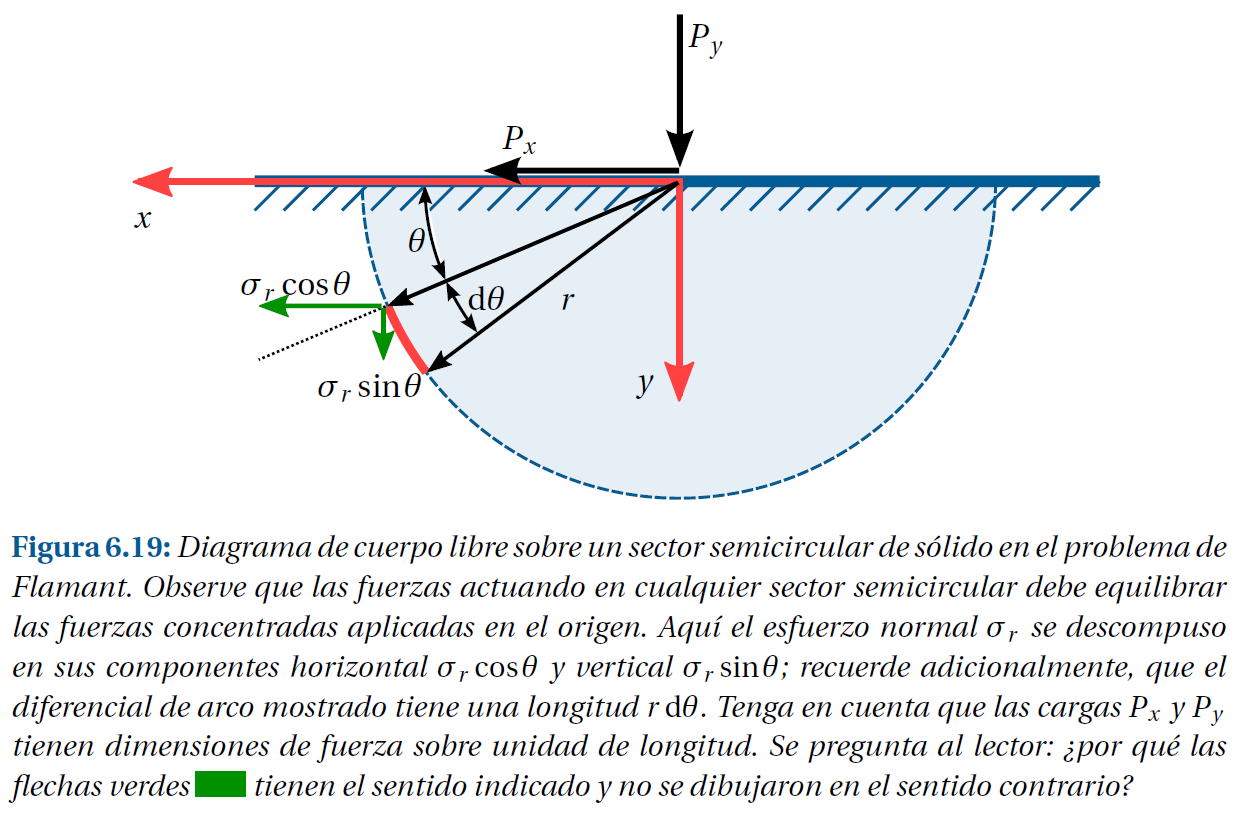

y al hacer equilibrio estático de fuerzas, podemos establecer que:
\begin{align}
        \sum F_x = 0 & \quad\implies\quad P_x + \int_0^\pi \sigma_r(r,\theta) \cos \theta r \operatorname{d} \! \theta = 0 \\        
        \sum F_y = 0 & \quad\implies\quad P_y + \int_0^\pi \sigma_r(r,\theta) \sin \theta r \operatorname{d} \! \theta = 0
\end{align}

Estas dos ecuaciones se pueden emplear para encontrar las constantes restantes, $B$ y $D$, así:

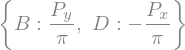

In [14]:
Px, Py = symbols('P_x, P_y')
sol_BD = solve([
            Eq(Px + integrate(sr*cos(t)*r, (t, 0, pi)), 0),
            Eq(Py + integrate(sr*sin(t)*r, (t, 0, pi)), 0)
         ], [B, D])

sol_BD

En consecuencia, la distribución de esfuerzos, se vuelve:

In [15]:
sr  = simplify(sr.subs (sol_BD))
st  = simplify(st.subs (sol_BD))
trt = simplify(trt.subs(sol_BD))

In [16]:
imprimir(r'\sigma_r(r,\theta) = ', sr)

<IPython.core.display.Math object>

In [17]:
imprimir(r'\sigma_\theta(r,\theta) = ', st)

<IPython.core.display.Math object>

In [18]:
imprimir(r'\tau_{r\theta}(r,\theta) = ', trt)

<IPython.core.display.Math object>

Esto quiere decir que no existen esfuerzos cortantes $\tau_{r\theta}$ ni normales $\sigma_\theta$ en el medio semiinfinito y que la carga aplicada se convierte, únicamente, en esfuerzos normales $\sigma_r$ que disminuyen de forma inversamente proporcional con la distancia $r$. Este tipo de distribución de esfuerzos se denomina **distribución radial simple** de esfuerzos.

Supongamos que sobre el medio semiinfinito únicamente está aplicada la carga vertical, ya que este es un caso muy usual en la práctica. Por lo tanto, al hacer $P_x = 0$ las ecuaciones de esfuerzos se simplifican, de modo que:

In [19]:
sr  = sr.subs (Px, 0)
st  = st.subs (Px, 0)
trt = trt.subs(Px, 0)

In [20]:
imprimir(r'\sigma_r(r,\theta) = ', sr)

<IPython.core.display.Math object>

In [21]:
imprimir(r'\sigma_t(r,\theta) = ', st)

<IPython.core.display.Math object>

In [22]:
imprimir(r'\tau_{r\theta}(r,\theta) = ', trt)

<IPython.core.display.Math object>

Empleando las ecuaciones para convertir coordenadas polares a rectangulares:
\begin{align}
\sigma_x &= \sigma_r\cos^2\theta + \sigma_\theta\sin^2\theta - \tau_{r\theta}\sin 2\theta \\
\sigma_y &= \sigma_r\sin^2\theta + \sigma_\theta\cos^2\theta - \tau_{r\theta}\sin 2\theta \\
\tau_{xy} &= \frac{1}{2}\left(\sigma_r - \sigma_\theta\right)\sin 2\theta + \tau_{r\theta}\cos 2\theta
\end{align}
reformulamos $\sigma_r(r,\theta), \sigma_\theta(r,\theta)$ y $\tau_{r\theta}(r,\theta)$:

In [23]:
sx  = sr*cos(t)**2 + st*sin(t)**2 - trt*sin(2*t)
sy  = sr*sin(t)**2 + st*cos(t)**2 + trt*sin(2*t)
txy = (sr-st)*sin(2*t)/2 + trt*cos(2*t)

In [24]:
imprimir(r'\sigma_x = ', sx)

<IPython.core.display.Math object>

In [25]:
imprimir(r'\sigma_y = ', sy)

<IPython.core.display.Math object>

In [26]:
imprimir(r'\tau_{xy} = ', txy)

<IPython.core.display.Math object>

Teniendo en cuenta la identidad trigonométrica $
\sin 2\theta = 2\sin\theta\cos\theta$, podemos reescribir $\tau_{xy}$ como:

In [27]:
txy  = txy.subs(sin(2*t), 2*sin(t)*cos(t))
imprimir(r'\tau_{xy} = ', txy)

<IPython.core.display.Math object>

Estas ecuaciones se pueden convertir a coordeandas rectangulares utilizando las transformaciones:
\begin{align}
\cos\theta &= \frac{x}{r} &
\sin\theta &= \frac{y}{r}
\end{align}
y teniendo en cuenta que:
\begin{equation}
r = \sqrt{x^2 + y^2}
\end{equation}

In [28]:
x = symbols('x')
y = symbols('y', positive=True)  # aquí se está especificando que y > 0
sx_xy  = sx.subs ({sin(t):y/r, cos(t):x/r, r:sqrt(x**2 + y**2)})
sy_xy  = sy.subs ({sin(t):y/r, cos(t):x/r, r:sqrt(x**2 + y**2)})
txy_xy = txy.subs({sin(t):y/r, cos(t):x/r, r:sqrt(x**2 + y**2)})

In [29]:
imprimir(r'\sigma_x = ', sx_xy)

<IPython.core.display.Math object>

In [30]:
imprimir(r'\sigma_y = ', sy_xy)

<IPython.core.display.Math object>

In [31]:
imprimir(r'\tau_{xy} = ', txy_xy)

<IPython.core.display.Math object>

In [32]:
# Se convierten los esfuerzos de sympy a numpy
esf_sr  = lambdify([r, t, Py], sr)
esf_sx  = lambdify([x, y, Py], sx_xy)
esf_sy  = lambdify([x, y, Py], sy_xy)
esf_txy = lambdify([x, y, Py], txy_xy)

## Esfuerzos para una profundidad y carga unitaria

A continuación se graficará como varían los esfuerzos para una profundidad unitaria ($y = 1$) y una carga unitaria ($P_y = 1$):

<function matplotlib.pyplot.show(close=None, block=None)>

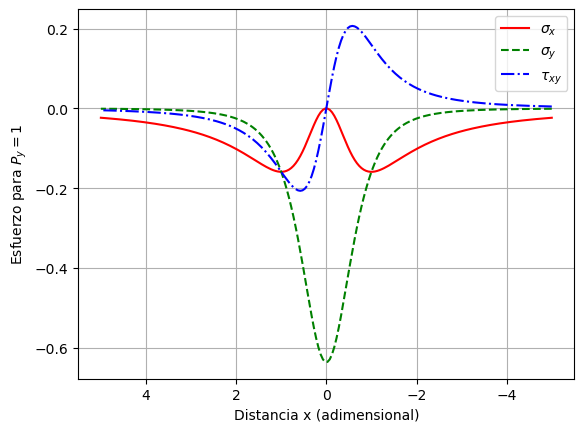

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x_  = np.linspace(-5, 5, 200)   
y_  = 1
Py_ = 1

sx_  = esf_sx (x_, y_, Py_)
sy_  = esf_sy (x_, y_, Py_)
txy_ = esf_txy(x_, y_, Py_)

fig, ax = plt.subplots()
ax.plot(x_, sx_,  '-r',  label=r'$\sigma_x$' )
ax.plot(x_, sy_,  '--g', label=r'$\sigma_y$' )
ax.plot(x_, txy_, '-.b', label=r'$\tau_{xy}$')
ax.legend(loc='best')
ax.set_xlabel('Distancia x (adimensional)')
ax.set_ylabel('Esfuerzo para $P_y = 1$')
ax.invert_xaxis()
ax.grid()
plt.show

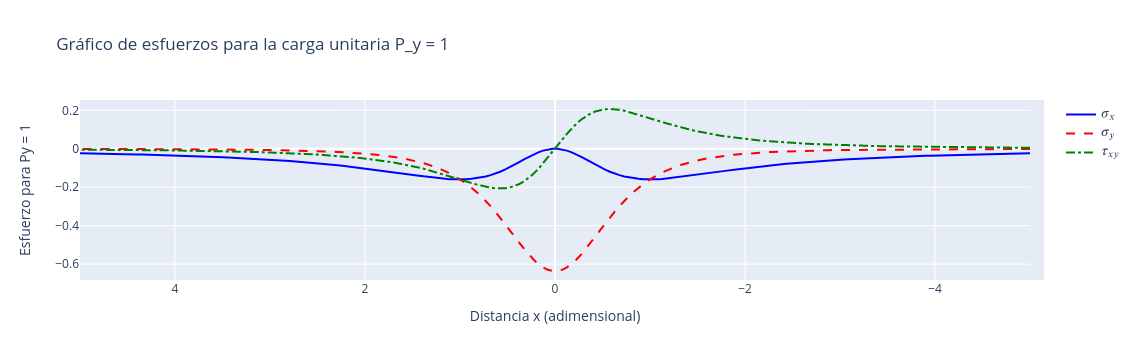

In [34]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=x_, y=sx_,  mode='lines', line=dict(color='blue',  dash='solid'),   name=r'$\sigma_x$') )
fig.add_trace(go.Scatter(x=x_, y=sy_,  mode='lines', line=dict(color='red',   dash='dash'),    name=r'$\sigma_y$') )
fig.add_trace(go.Scatter(x=x_, y=txy_, mode='lines', line=dict(color='green', dash='dashdot'), name=r'$\tau_{xy}$'))
fig.update_layout(xaxis_title='Distancia x (adimensional)', 
                  yaxis_title='Esfuerzo para Py = 1',
                  title='Gráfico de esfuerzos para la carga unitaria P_y = 1')
fig.update_xaxes(autorange="reversed")
fig.show()

En particular, observe que $\sigma_y$ es máximo en $x = 0$ y que los esfuerzos prácticamente se disipan para $|x| > 4$.

## Cálculo de los esfuerzos principales y del esfuerzo cortante máximo

Para calcular el esfuerzo cortante máximo y los esfuerzos principales se puede hacer uso de las ecuaciones:
\begin{align}
\tau_{máx} &= \sqrt{\left(\frac{\sigma_x - \sigma_y}{2}\right)^2 + \tau_{xy}^2} \\
(\sigma_1)_{xy} &= \frac{\sigma_x + \sigma_y}{2} + \sqrt{\left(\frac{\sigma_x - \sigma_y}{2}\right)^2 + \tau_{xy}^2} \\
(\sigma_2)_{xy} &= \frac{\sigma_x + \sigma_y}{2} - \sqrt{\left(\frac{\sigma_x - \sigma_y}{2}\right)^2 + \tau_{xy}^2}
\end{align}

Además asumiremos que todos $r$ solo puede tomar valores positivos.

In [35]:
tmax = simplify(sqrt(((sx-sy)/2)**2  + txy**2))
tmax = tmax.subs(2*sin(t)**2, 1 - cos(2*t))
tmax = tmax.subs(Py**2, abs(Py)**2)

In [36]:
imprimir(r'\tau_\text{máx}(r, \theta) = ', tmax)

<IPython.core.display.Math object>

Teniendo en cuenta que $\theta \in [0,\pi)$, la expresión $\tau_{máx}(r, \theta)$ se puede reescribir como:

In [37]:
tmax = abs(Py)*sin(t)/(pi*r)

In [38]:
imprimir(r'\tau_\text{máx}(r, \theta) = ', tmax)

<IPython.core.display.Math object>

Ahora para se calculan los esfuerzos principales y se simplifica utilizando la identidad trigonométrica:
\begin{equation}
2\sin^2 \theta = 1 - \cos 2\theta
\end{equation}

In [39]:
s1 = (sx+sy)/2 + tmax
s2 = (sx+sy)/2 - tmax

s1 = simplify(s1.subs(2*sin(t)**2, 1 - cos(2*t)))
s2 = simplify(s2.subs(2*sin(t)**2, 1 - cos(2*t)))

In [40]:
imprimir(r'(\sigma_1)_{xy}(r, \theta) = ', s1)

<IPython.core.display.Math object>

In [41]:
imprimir(r'(\sigma_2)_{xy}(r, \theta) = ', s2)

<IPython.core.display.Math object>

El ángulo de inclinación $\theta$ para el cual suceden los esfuerzos principales $\sigma_1$ se obtiene mediante:

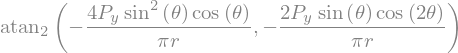

In [42]:
dos_theta = atan2(2*txy, sx-sy).simplify()

dos_theta

sin embargo, el comando anterior no simplifica ni provee una respuesta adecuada; intentemos con:

In [43]:
tan_2t1 = simplify(2*txy/(sx-sy))

imprimir(r'\tan{2\theta_1} = ', tan_2t1)

<IPython.core.display.Math object>

Observe que los signos menos en el numerador y el denominador de los argumentos de `atan2()`:
\begin{equation}
	\operatorname{atan2}(y, x) =
	\begin{cases}
		\arctan\left(\frac{y}{x}\right)       & \text{si } x > 0 \\
		\arctan\left(\frac{y}{x}\right) + \pi & \text{si } y \ge 0, x < 0 \\
		\arctan\left(\frac{y}{x}\right) - \pi & \text{si } y < 0, x < 0 \\
		\frac{\pi}{2}                         & \text{si } y > 0, x = 0 \\
		-\frac{\pi}{2}                        & \text{si } y < 0, x = 0 \\
		\text{indefinido}                     & \text{si } y = 0, x = 0
	\end{cases};
\end{equation}
indican que la solución está en el tercer cuadrante y por lo tanto, si solucionamos el ángulo con `atan()` debemos restarle un $\pi$ y por lo tanto la solución correcta es: 
\begin{equation}
    \tan{2\theta_1} = \tan(2\theta - \pi)
\end{equation}

Esto quiere decir que $\theta_1 = \theta - \pi/2$ y que $\theta_2 = \theta_1 + \pi/2 = \theta$, por lo que se deduce que el esfuerzo normal máximo $\sigma_1$ actúa en la dirección angular, para la cual $\theta_1 = \theta - \pi/2$ y el esfuerzo normal mínimo  $\sigma_2$ actúa en la dirección radial, para la cual $\theta_2 = \theta$ como se observa:

<lambdifygenerated-2>:2: RuntimeWarning:

invalid value encountered in divide

<lambdifygenerated-3>:2: RuntimeWarning:

invalid value encountered in divide

<lambdifygenerated-4>:2: RuntimeWarning:

invalid value encountered in divide



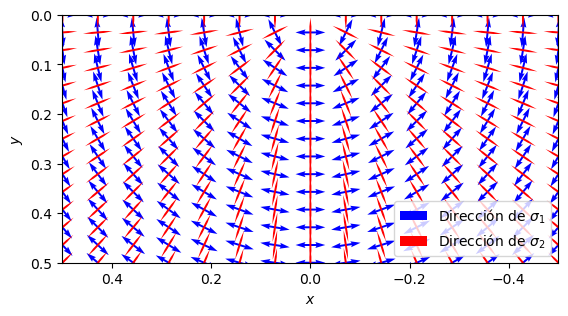

In [44]:
xx     = np.linspace(-0.5, 0.5, 15)
yy     = np.linspace(0, 0.5, 15)
x_, y_ = np.meshgrid(xx, yy) 
Py_    = 1

sx_  = esf_sx (x_, y_, Py_)
sy_  = esf_sy (x_, y_, Py_)
txy_ = esf_txy(x_, y_, Py_)

t1 = np.arctan2(2*txy_, sx_ - sy_)/2
t2 = t1 + np.pi/2

fig, ax = plt.subplots()
esc = 0.03
h1 = ax.quiver(x_, y_,  np.cos(t1),  np.sin(t1), scale=1/esc, color='b')
h2 = ax.quiver(x_, y_, -np.cos(t1), -np.sin(t1), scale=1/esc, color='b')
h3 = ax.quiver(x_, y_,  np.cos(t2),  np.sin(t2), scale=1/esc, color='r', headwidth=0, headlength=0)
h4 = ax.quiver(x_, y_, -np.cos(t2), -np.sin(t2), scale=1/esc, color='r', headwidth=0, headlength=0)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0, 0.5)
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_aspect('equal')
ax.legend([h1, h3],['Dirección de $\sigma_1$', 'Dirección de $\sigma_2$'], loc='lower right')
plt.show()

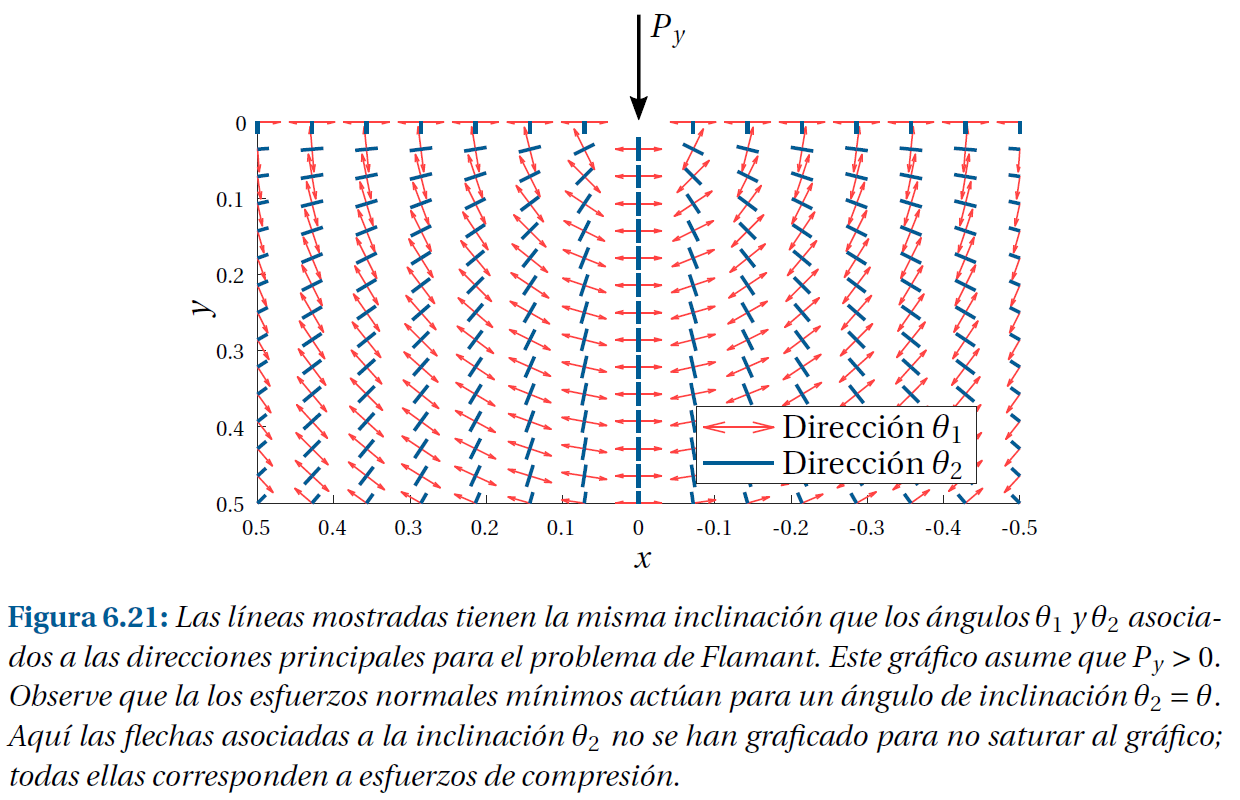

Hagamos un alto para interpretar las ecuaciones que acabamos de deducir. En el caso de que $P_y > 0$, se tiene de un lado que el esfuerzo principal $\sigma_1$ actúa en la dirección angular y es nulo, esto es $\sigma_1 = 0$ y $\theta_1=\theta - \pi/2$; de otro lado, en la dirección radial $\theta_2 = \theta$, y todo el semiplano se encuentra a compresión. En este caso, $\sigma_r = \sigma_2 = -2 \tau_{\max} = -\frac{2 P_y}{\pi r}\sin\theta$; adicionalmente, tanto $\sigma_r$ como $\sigma_2$ y como $\tau_{\max}$ tendrán curvas de nivel circulares anidadas que son tangentes al origen de coordenadas, en el punto de aplicación de la carga (ver Figura 6.22a); esto se justifica en el hecho de que la función $f(r,\theta) = r^{-1} \sin\theta = d^{-1}$, para un valor $d$ constante, se grafica en el plano polar como una circunferencia de diámetro $d$ tangente al punto de aplicación de la carga; esto se observa en la Figura 6.22b. Desde este punto de vista, la curva de nivel del esfuerzo cortante máximo $\tau_{\max}$ unitario ($\tau_{\max} = 1 \text{ [Pa]}$) es una circunferencia con diámetro $|P_y|/\pi$ (¿podría dar los detalles?); adicionalmente, según lo anteriormente expuesto, es posible escribir $\sigma_r$, como:
\begin{equation}
    \sigma_r(d) = -\frac{2 P_y}{\pi d}.  \label{Flamantsrsttrt_soloPy_d}
\end{equation}

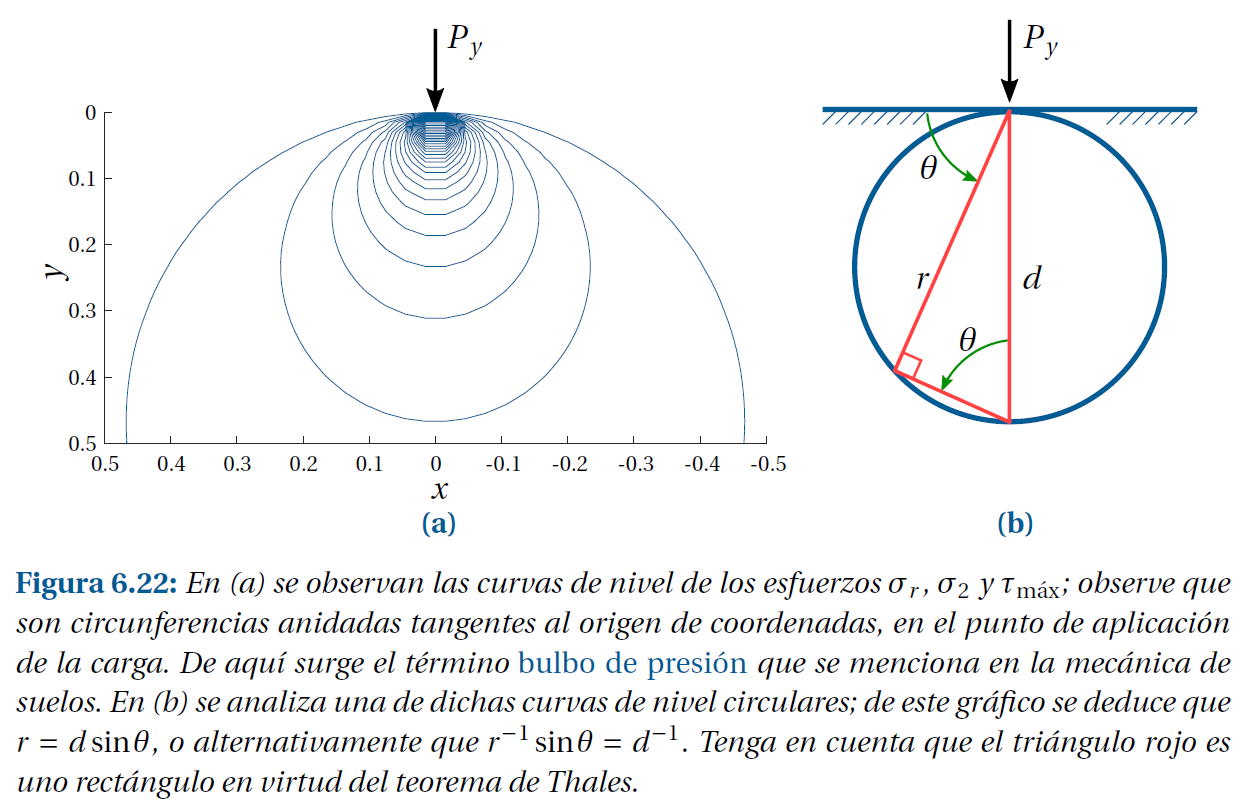

In [45]:
xx     = np.linspace(-3, 3, 200)   
yy     = np.linspace( 0, 3, 200)       
x_, y_ = np.meshgrid(xx, yy)  
t_      = np.arctan2(y_, x_)
r_      = np.hypot(x_, y_)

Py_ = 1
sr_  = esf_sr (r_, t_, Py_)
sx_  = esf_sx (x_, y_, Py_)
sy_  = esf_sy (x_, y_, Py_)
txy_ = esf_txy(x_, y_, Py_)

tmax_ = np.hypot((sx_ - sy_)/2, txy_)
s2_   = (sx_ + sy_)/2 - tmax_

def dibujar_esf (titulo, x, y, var):
    fig, ax = plt.subplots()
    ax.contour(x, y, var, 30, colors='C0', linestyles='solid', linewidths=0.5)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(titulo)
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(0, 0.5)
    ax.set_aspect('equal')
    ax.invert_yaxis()

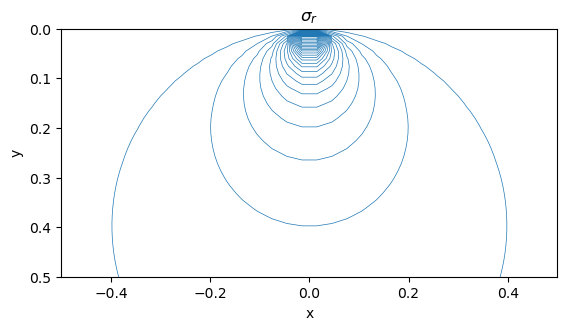

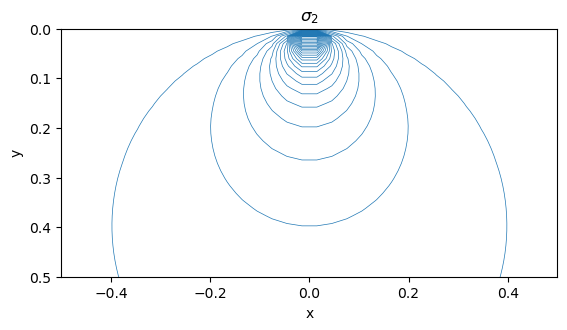

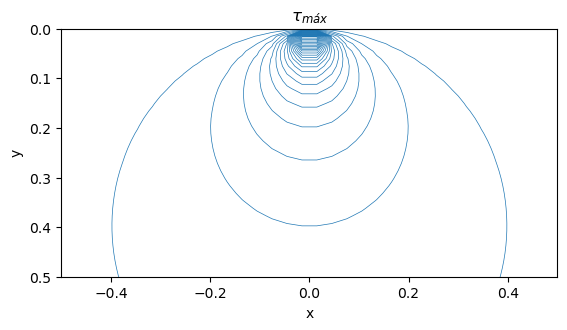

In [46]:
dibujar_esf(r"$\sigma_r$",   x_, y_, sr_)
dibujar_esf(r"$\sigma_2$",   x_, y_, s2_)
dibujar_esf(r"$\tau_{máx}$", x_, y_, tmax_)

## Se calculan las deformaciones y los desplazamientos asumiendo tensión plana

Si asumimos una condición de **tensión plana**, podemos determinar las deformaciones en la masa del sólido, utilizando la ley de Hooke:
\begin{align}
\varepsilon_{r} &= \frac{1}{E}(\sigma_r - \nu\sigma_\theta) \\
\varepsilon_{\theta} &= \frac{1}{E}(\sigma_\theta - \nu\sigma_r) \\
\varepsilon_{z} &= \frac{-\nu}{E}(\sigma_r + \sigma_\theta) \\
\gamma_{r\theta} &= \frac{1}{G}\tau_{r\theta} \\
\gamma_{rz} &= 0 \\
\gamma_{\theta z} &= 0
\end{align}

In [47]:
E, nu, G = symbols('E, nu, G')
er   = (1/E)*(sr - nu*st)
et   = (1/E)*(st - nu*sr)
ez   = -(nu/E)*(sr + st)
grt1 = trt/G

In [48]:
imprimir(r'\varepsilon_{r}(r,\theta) = ', er)

<IPython.core.display.Math object>

In [49]:
imprimir(r'\varepsilon_{\theta}(r,\theta) = ', et)

<IPython.core.display.Math object>

In [50]:
imprimir(r'\varepsilon_{z}(r,\theta) = ', ez)

<IPython.core.display.Math object>

In [51]:
imprimir(r'\gamma_{r\theta}(r,\theta) = ', grt1)

<IPython.core.display.Math object>

Vamos ahora a calcular los desplazamientos $u_r$ y $v_\theta$. Para tal fin, a partir de las ecuaciones:
\begin{align}
\varepsilon_{r}(r, \theta) &= \frac{\partial u_r(r, \theta)}{\partial r} \\
\varepsilon_{\theta}(r, \theta) &= \frac{u_r(r, \theta)}{r} + \frac{1}{r}\frac{\partial v_\theta(r, \theta)}{\partial \theta}
\end{align}
se encuentra que:
\begin{align}
\frac{\partial u_r(r, \theta)}{\partial r} &= \varepsilon_{r}(r, \theta)\\
\frac{\partial v_\theta(r, \theta)}{\partial \theta} &= r\varepsilon_{\theta}(r, \theta) - u_r(r, \theta)
\end{align}

Ahora se calculan los desplazamientos integrando las derivadas anteriores:

In [52]:
f = Function('f')(t)
g = Function('g')(r)
ur = simplify(integrate(er,r) + f)
vt = simplify(integrate(r*et - ur, t) + g)

In [53]:
imprimir(r"u_r(r,θ) = \int\varepsilon_r(r',θ)\operatorname{d}\!r'+f(θ) = ", ur)

<IPython.core.display.Math object>

In [54]:
imprimir(r"v_θ(r,θ) = \int\left[r\varepsilon_θ(r,θ') - u_r(r,θ')\right]\operatorname{d}\!θ' + g(r) = ", vt)

<IPython.core.display.Math object>

donde $ f : \mathbb{R} \rightarrow \mathbb{R}$ y $ g : \mathbb{R} \rightarrow \mathbb{R}$ son funciones arbitrarias que aparecen al integrar una función de varias variables. Observe, en particular, que $f(\theta)$ y $g(r)$ son funciones de $\theta$ y $r$, respectivamente. Ambas funciones, las determinaremos a continuación.

Reemplazamos $u_r$ y $v_\theta$ en la ecuación:
\begin{equation}
\gamma_{r\theta}(r,\theta) = \frac{1}{r}\frac{\partial u_r}{\partial \theta} + \frac{v_\theta}{\partial r} - \frac{v_\theta}{r}
\end{equation}
Y se iguala con el $\gamma_{r\theta}$ calculado anteriormente:

In [55]:
grt2 = (1/r)*diff(ur,t) + diff(vt,r) - vt/r
eq   = simplify((grt2 - grt1)*r)

In [56]:
imprimir("", eq, " = 0 ")

<IPython.core.display.Math object>

Esta es una igualdad escrita en términos de las funciones $f(\theta)$ y $g(r)$, las cuales son dependen únicamente de una variable. Por lo tanto, la ecuación anterior se puede descomponer en dos igualdades, que son:
\begin{align}
    \frac{\operatorname{d}\! f(\theta)}{\operatorname{d}\! \theta} + \int f(\theta) \operatorname{d}\! \theta + \frac{2 P_y}{\pi E}  (\nu - 1) \cos \theta - C_0 &= 0 \\
    r \frac{\operatorname{d}\! g(r)}{\operatorname{d}\! r} - g(r) + C_0 &= 0; \label{eq:FlamantODEg}
\end{align}
donde $C_0$ es una constante arbitraria; observe que la primera de estas igualdades es función únicamente de $\theta$, mientras que la segunda lo es de $r$.

Al derivar la primera de estas igualdades con respecto a $\theta$, para eliminar la integral, se convierte en la ecuación diferencial ordinaria de segundo orden:
\begin{equation}
    \frac{\operatorname{d}\!^2 f(\theta)}{\operatorname{d}\! \theta^2} + f(\theta) + \frac{2 P_y}{\pi E}  (1 - \nu) \sin \theta = 0. \label{eq:FlamantODEf}
\end{equation}

Ahora procedemos a resolver la ecuación diferencial:

In [57]:
C0  = symbols('C0')
eq1 = Eq(diff(f,t,2) + f + (2*Py*(1-nu)*sin(t))/(pi*E), 0)
eq2 = Eq(r*diff(g, r) - g + C0, 0)

In [58]:
solf = dsolve(eq1, f)
solg = dsolve(eq2, g)

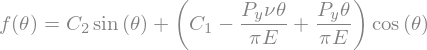

In [59]:
solf

In [60]:
solg

Se reescriben las constantes de modo que aparezcan igual que en el libro:

In [61]:
A, B       = symbols('A, B')
C1, C2, C3 = symbols('C1, C2, C3')

F = solf.rhs.subs({C1:A, C2:B})
F = F.subs({A:C2, B:C1})
G = solg.rhs.subs({C1:C3})

Y se obtiene

In [62]:
imprimir(r"f(\theta) =", F)

<IPython.core.display.Math object>

In [63]:
imprimir("g(r) =", G)

<IPython.core.display.Math object>

Aquí $C_0$, $C_1$, $C_2$ y $C_3$ son constantes de integración; al reemplazar las funciones $f$ y $g$ anteriores en las ecuaciones de $u_r$ y $v_\theta$ se obtiene:

In [64]:
ur = expand(ur.subs(f, F))
vt = expand(simplify(vt.subs({f:F, g:G})))

In [65]:
imprimir(r"u_r(r, \theta) = ", ur.collect(Py/(pi*E)))

<IPython.core.display.Math object>

In [66]:
imprimir(r"v_\theta(r, \theta) = ", vt.collect(Py/(pi*E)))

<IPython.core.display.Math object>

Para determinar el valor de las constantes $C_0$ a $C_3$ utilizamos las condiciones de simetría del problema; así pues, no se tienen desplazamientos horizontales en el eje vertical (eje $y$) mostrado en la Figura 6.18, lo cual se escribe matemáticamente como:
\begin{equation}
v_\theta\left(r, \frac{\pi}{2}\right) = 0
\end{equation}
para todo $r > 0$:

In [67]:
vt_r_pi2 = vt.subs(t, pi/2)

imprimir(r"v_\theta\left(r, \frac{\pi}{2}\right) = ", vt_r_pi2, " = 0")

<IPython.core.display.Math object>

Esta condición se satisface haciendo $C_2 = C_0 + \frac{ \nu - 1}{2E}P_y$  y  $C_3 = 0$, ya que la ecuación anterior debe ser válida para todo r > 0.
\
Otra condición de frontera reside en el hecho de que a una distancia vertical prudente $r_0$ del punto de aplicación de la carga se tiene que el desplazamiento es nulo, esto es $u_r(r_0, \pi/2) = 0$

In [68]:
r0 = symbols('r_0')
ur_r0_pi2 = ur.subs({r:r0, t:pi/2})

imprimir(r"u_r(r_0, \pi/2) = ", ur_r0_pi2, "= 0")

<IPython.core.display.Math object>

De aquí que $C_1 =  \frac{ 2 P_y}{\pi E}\ln{r_0}$.

Finalmente, se sabe que $u_r = v_\theta = 0$ Cuando $P_y = 0$: en este caso $C_1 = 0$, $C_2 = C_0$ y $C_3 = 0$, por lo tanto:

In [69]:
ur_Py0 = ur.subs({Py:0, C1:0, C2:C0, C3:0})
vt_Py0 = vt.subs({Py:0, C1:0, C2:C0, C3:0})

In [70]:
imprimir(r"u_r(r, \theta) = ", ur_Py0)

<IPython.core.display.Math object>

In [71]:
imprimir(r"u_r(r, \theta) = ", vt_Py0)

<IPython.core.display.Math object>

Estas igualdades se satisfacen siempre y cuando $C_0 = 0$, ya que ambas ecuaciones deben cumplirse para todo $\theta \in [0,\pi]$.

En conclusión, al reemplazar en las ecuaciones iniciales de $u_r(r, \theta)$ y $v_\theta(r, \theta)$ los valores encontrados para las constantes de integración, esto es $C_0 = C_3 = 0$,  $C_1 =  \frac{ 2 P_y}{\pi E}\ln{r_0}$ y $C_2 = \frac{ \nu - 1}{2E}P_y$, se tiene que el desplazamiento del medio semiinfinito está dado por:

In [72]:
ur = expand(simplify(ur.subs({C0:0, C1:2*Py*log(r0)/(pi*E), C2:(nu-1)*Py/(2*E), C3:0})))
vt = expand(simplify(vt.subs({C0:0, C1:2*Py*log(r0)/(pi*E), C2:(nu-1)*Py/(2*E), C3:0})))

In [73]:
imprimir(r"u_r(r, \theta) = ", ur)

<IPython.core.display.Math object>

In [74]:
imprimir(r"v_\theta(r, \theta) = ", vt)

<IPython.core.display.Math object>

donde $r \in [0,r_0]$.

Finalmente calculamos la solución sobre la superficie libre, es decir para $\theta = 0$ y $\theta = \pi$:

In [75]:
ur_sl_0 = factor(ur.subs(t, 0));         ur_sl_pi = factor(ur.subs(t, pi))
vt_sl_0 = factor(vt.subs(t, 0));         vt_sl_pi = factor(vt.subs(t, pi))

In [76]:
imprimir(r"u_r(r, 0) = ", ur_sl_0)

<IPython.core.display.Math object>

In [77]:
imprimir(r"u_r(r, \pi) = ", ur_sl_pi)

<IPython.core.display.Math object>

In [78]:
imprimir(r"v_\theta(r, 0) = ", vt_sl_0)

<IPython.core.display.Math object>

In [79]:
imprimir(r"v_\theta(r, \pi) = ", vt_sl_pi)

<IPython.core.display.Math object>

De lo que podemos concluir que:
\begin{equation}
u_r(r, 0) = u_r(r, \pi) = - \frac{ P_y}{2 E}(1-\nu)
\end{equation}
\begin{equation}
v_\theta(r, 0) = v_\theta(r, \pi) = - \frac{ P_y}{\pi E}\left(1+\nu + 2\log\left(\frac{r}{r_0}\right)\right)
\end{equation}
\
Y la solución sobre el eje vertical, exactamente debajo de la carga, cuando $\theta = \pi/2$:

In [80]:
ur_pi_2 = factor(ur.subs(t, pi/2))

imprimir(r"u_r(r, \pi/2) = ", ur_pi_2)

<IPython.core.display.Math object>

In [81]:
vt_pi_2 = factor(vt.subs(t, pi/2))

imprimir(r"v_\theta(r, \pi/2) = ", vt_pi_2)

<IPython.core.display.Math object>

La solución que acabamos de encontrar adolece de varios defectos: 

1. Observe que todos los puntos de la superficie libre se mueven horizontalmente la misma cantidad $\frac{ P_y}{2 E}(1-\nu)$ hacia el punto de aplicación de la carga; esto sucede incluso para valores de $r$ que tienden a $r_0$, o incluso al infinito.
2. En $r=0$ se tiene un punto de singularidad, para el cual los desplazamientos son infinitos. 
3. El valor de $r_0$ no está claramente definido y la respuesta depende del número que se asuma en el cálculo.

En la Figura 6.23, se observa la deformada predicha por las ecuaciones para el desplazamiento del medio semiinfinito para $\frac{P_y}{E} = 1$ y $\nu = 0.3$:

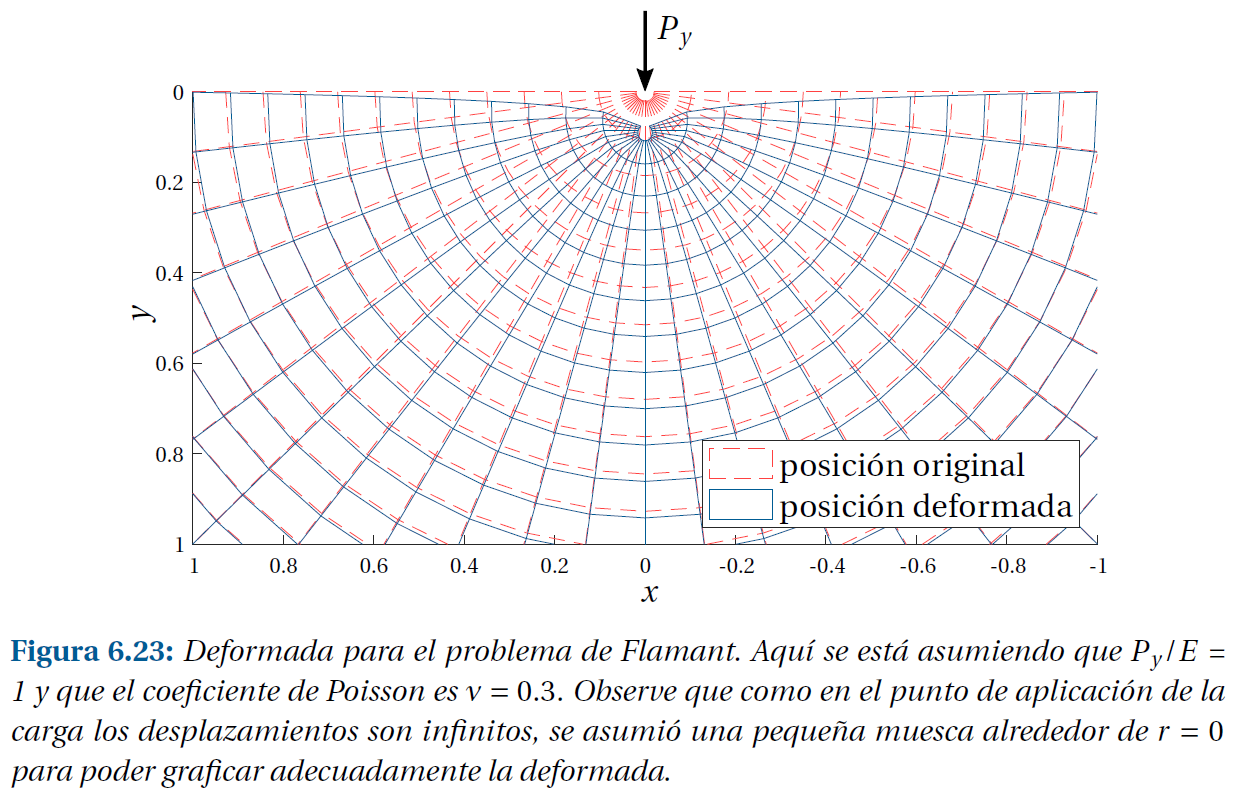

In [82]:
Py = 1     # carga unitaria
E  = 1     # módulo de elasticidad unitario
nu = 0.3   # coeficiente de Poisson

# se define la geometría
r0 = 2     # distancia a la que se asume que el desplazamiento vertical es nulo

# se definen r y t. r empieza en 0.02 para evitar singularidad en el origen
rr = np.linspace(0.02, 2, 25)
tt = np.linspace(0, np.pi, 25)
t,r = np.meshgrid(tt, rr)   # puntos donde se va a hacer el cálculo
x = r*np.cos(t)             # de coordenadas polares a cartesianas 
y = r*np.sin(t)

In [83]:
# se calculan los desplazamientos en coord. polares
ur =  (Py/(np.pi*E))*((1-nu)*(t-np.pi/2)*np.cos(t) - 2*np.log(r/r0)*np.sin(t))
vt = -(Py/(np.pi*E))*((1-nu)*(t-np.pi/2)*np.sin(t) + (1 + nu + 2*np.log(r/r0))*np.cos(t))

# se convierten los desplazamientos a coord. cartesianas
u = ur*np.cos(t) - vt*np.sin(t)
v = ur*np.sin(t) + vt*np.cos(t)

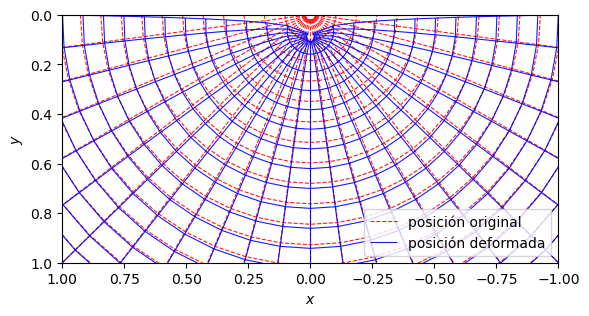

In [84]:
from matplotlib.collections import LineCollection

def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    h = ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))
    return h

# se hace la gráfica
fig, ax = plt.subplots()    # se crea el lienzo
esc = 0.03;                 # escala para exagerar el desplazamiento

# se grafica la posición original
h1 = plot_grid(x, y,             ax=ax, color="r", linestyle='--', linewidth=0.8, alpha=0.9)

# se grafica la posición deformada y se escala "esc" veces el desplazamiento
h2 = plot_grid(x+esc*u, y+esc*v, ax=ax, color="b", linestyle='-',  linewidth=0.8, alpha=0.9)

ax.set_xlabel('$x$')        # título del eje X
ax.set_ylabel('$y$')        # título del eje Y
ax.set_xlim(-1, 1)          # [xmin, xmax]
ax.set_ylim(0, 1)           # [ymin, ymax]
ax.set_aspect('equal')      # ejes iguales y ajustados
ax.invert_xaxis()           # el eje X positivo va hacia la izquierda
ax.invert_yaxis()           # el eje Y positivo va hacia abajo
ax.legend([h1, h2], ['posición original','posición deformada'], loc='lower right')
plt.show()